In [54]:
# Outils essentiels
import pandas as pds
import seaborn as sns
import numpy as np

# Traitement des données
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Outils d'intelligence artificielle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Visualisation
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Mesures de qualité
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

# Traitement des données

In [92]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df_i = pds.read_csv('./train.csv', sep=",") # load a pandas dataframe from csv in current directory
df_i.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
m_age=df_i['Age'].median()
#df_i['Age']=df_i['Age'].fillna(m_age)
df = df_i.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1).dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


In [105]:
df = df.replace(['male','female'],[0,1])
#df = df.replace(['S','C','Q'],[0,0.5,1])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


In [106]:
df.describe()
#sorted(df['Fare'])



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


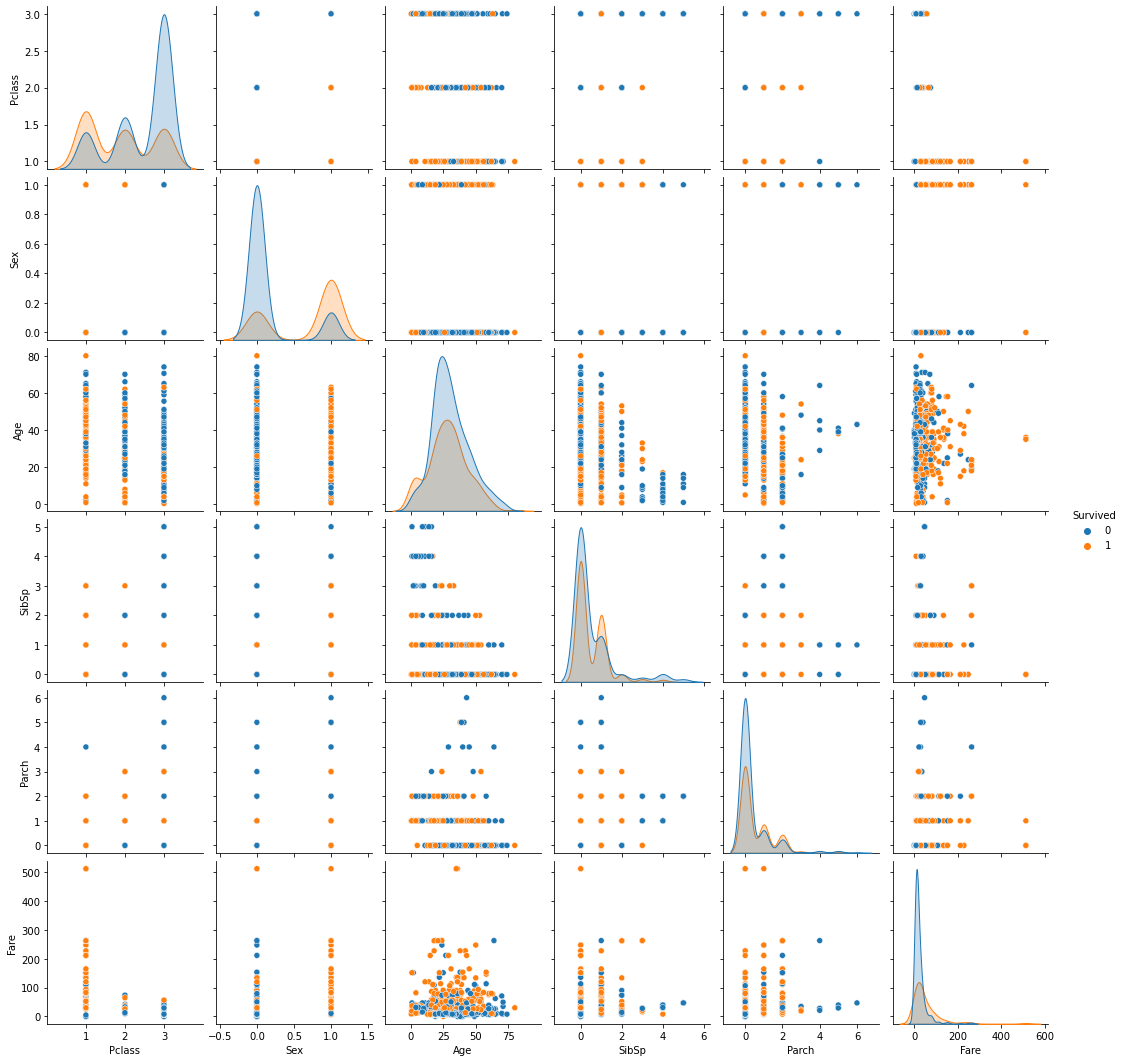

In [107]:
df2 = df.copy()
sns.pairplot(data=df2 , hue = 'Survived')

In [108]:
X = df.drop('Survived', axis=1)
Y = df['Survived']
features = ["Pclass","Age","SibSp","Parch","Fare"]
scaler = MinMaxScaler()

X_normalized = X.copy()
X_normalized[features] = scaler.fit_transform(X[features])
X_normalized

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,0,0.271174,0.2,0.000000,0.014151
1,0.0,1,0.472229,0.2,0.000000,0.139136
2,1.0,1,0.321438,0.0,0.000000,0.015469
3,0.0,1,0.434531,0.2,0.000000,0.103644
4,1.0,0,0.434531,0.0,0.000000,0.015713
...,...,...,...,...,...,...
885,1.0,1,0.484795,0.0,0.833333,0.056848
886,0.5,0,0.334004,0.0,0.000000,0.025374
887,0.0,1,0.233476,0.0,0.000000,0.058556
889,0.0,0,0.321438,0.0,0.000000,0.058556


In [109]:
len(df_i.loc[df_i['Survived'] == 1 ])

342

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y,test_size=0.3,random_state=42)

In [111]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
37,1.0,0,0.258608,0.0,0.000000,0.015713
58,0.5,1,0.057552,0.2,0.333333,0.054164
57,1.0,0,0.352852,0.0,0.000000,0.014110
94,1.0,0,0.736115,0.0,0.000000,0.014151
209,0.0,0,0.497361,0.0,0.000000,0.060508
...,...,...,...,...,...,...
92,0.0,0,0.572757,0.2,0.000000,0.119406
134,0.5,0,0.308872,0.0,0.000000,0.025374
337,0.0,1,0.509927,0.0,0.000000,0.262527
548,1.0,0,0.409399,0.2,0.166667,0.040062


In [112]:
y_train

37     0
58     1
57     0
94     0
209    1
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 499, dtype: int64

### 1ère étape - Lancer le modèle avec plusieurs K et calculer le score d'accuracy pour déterminer le K-optimal

0.8


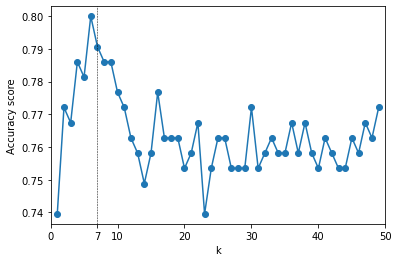

In [126]:
from sklearn.metrics import accuracy_score
scores = []
for k in range(1,50):
    knnc = KNeighborsClassifier(n_neighbors=k, p=2)  
    knnc.fit(X_train, y_train)
    y_predict = knnc.predict(X_test)
    scores.append(accuracy_score(y_predict,y_test))
print(max(scores))

plt.plot(range(1,50), scores, marker = "o")
plt.xlabel("k")
plt.ylabel("Accuracy score")
plt.axvline(x=7,color="k",linewidth = 0.5, linestyle ="--")
xticks = list(plt.xticks()[0])

# Ajouter 7 s'il n'est pas déjà présent
if 7 not in xticks:
    xticks.append(7)
    xticks.sort()

plt.xticks(xticks)
plt.xlim(0, 50)

plt.show()

The maximum accuracy score is reached for k=7

In [66]:
knnc = KNeighborsClassifier(n_neighbors=7, p=1)  
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

### 2 ème étape - Calculer la matrice de confusion pour le K choisi

184
167


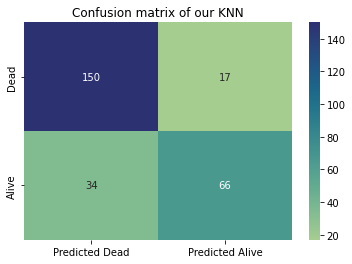

In [67]:
conf_matrix = confusion_matrix(y_test, y_predict)
nb_0=0
for i in range (len(y_predict)):
    if (y_predict[i]==0):
        nb_0+=1
print(nb_0)
nb_02=0
for i in y_test:
    if i == 0:
        nb_02+=1
print(nb_02)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="crest", xticklabels=['Predicted Dead','Predicted Alive'], yticklabels=[
    'Dead','Alive'])
plt.title("Confusion matrix of our KNN")
plt.show()

### 3 ème étape - Evaluer la qualité du modèle avec d'autres indicateurs (accuracy, precision, recall, F-1 score)

In [68]:
classes = df.Survived
print(classes)
sortedLabelList = [0, 1]
print(sortedLabelList)
metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64
[0, 1]


array([[150,  17],
       [ 34,  66]])

In [69]:
# Remplacer les indices par les étiquettes dans la matrice de confusion
label_dict = {0: 'Dead', 1: 'Survived'}


sortedLabel=['Dead','Survived']
pds.DataFrame(
    metrics.confusion_matrix(y_true = y_test, y_pred=y_predict, labels=None),
    columns=['Predicted Dead','Predicted Alive'],
    index=['True Dead', 'True Alive']
)




,Predicted Dead,Predicted Alive
True Dead,150,17
True Alive,34,66


En version découpée

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8089887640449438

In [71]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average="weighted"), precision_score(y_test,y_predict,average="macro")

(0.8077130211122947, 0.805199057097957)

In [72]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predict,average="weighted"), recall_score(y_test,y_predict,average="macro")

(0.8089887640449438, 0.7791017964071856)

In [73]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict,average="weighted"), f1_score(y_test,y_predict,average="macro")

(0.8047422856780012, 0.7880061650553454)

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
report_dict = classification_report(
    y_test,
    y_predict,
    output_dict=True
)

df_report = pds.DataFrame(report_dict).transpose()

df_report = df_report.round(6)

df_report

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       126
           1       0.75      0.67      0.71        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



,precision,recall,f1-score,support
0,0.785185,0.841270,0.812261,126.000000
1,0.750000,0.674157,0.710059,89.000000
accuracy,0.772093,0.772093,0.772093,0.772093
macro avg,0.767593,0.757714,0.761160,215.000000
weighted avg,0.770620,0.772093,0.769954,215.000000


### 4 ème étape - Cross-valider avec une méthode par une stratified cross-validation

In [134]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(knnc, X_normalized, Y , scoring=scoring,
                        cv=cv, return_train_score=False)

scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted', 'test_f1_macro', 'test_f1_weighted'])

In [143]:
print('Global accuracy over all folds: %0.6f (+/- %0.6f)'
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))

print('For each metric, list the score values on each fold:')
for metric in sorted(scores.keys()):
    print(
        str(['{:.6f}'.format(value) for value in scores[metric]])
        + ' ' + metric
    )

df_scores = pds.DataFrame({
    'Fit time' : scores['fit_time'],
    'Score time':scores['score_time'],
    'Accuracy': scores['test_accuracy'],
    'Precision (weighted)': scores['test_precision_weighted'],
    'Recall (weighted)': scores['test_recall_weighted'],
    'F1 (weighted)': scores['test_f1_weighted'],
})

# Nommer les folds
df_scores.index = [f'Fold {i+1}' for i in range(len(df_scores))]
df_scores.loc['Mean'] = df_scores.mean()
df_scores.loc['Std'] = df_scores.std()  

# Arrondir pour affichage / Excel
df_scores = df_scores.round(6)

df_scores


Global accuracy over all folds: 0.770344 (+/- 0.031449)
For each metric, list the score values on each fold:
['0.003261', '0.001649', '0.001668', '0.001377', '0.001469'] fit_time
['0.014170', '0.010349', '0.007646', '0.009549', '0.008612'] score_time
['0.776224', '0.748252', '0.762238', '0.769231', '0.795775'] test_accuracy
['0.749123', '0.734091', '0.747087', '0.745098', '0.775157'] test_f1_macro
['0.764691', '0.745677', '0.758775', '0.759907', '0.787623'] test_f1_weighted
['0.797243', '0.740385', '0.757097', '0.779890', '0.812968'] test_precision_macro
['0.788773', '0.745831', '0.760325', '0.775172', '0.805517'] test_precision_weighted
['0.740568', '0.730730', '0.742495', '0.737424', '0.766010'] test_recall_macro
['0.776224', '0.748252', '0.762238', '0.769231', '0.795775'] test_recall_weighted


,Fit time,Score time,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
Fold 1,0.003261,0.014170,0.776224,0.788773,0.776224,0.764691
Fold 2,0.001649,0.010349,0.748252,0.745831,0.748252,0.745677
Fold 3,0.001668,0.007646,0.762238,0.760325,0.762238,0.758775
Fold 4,0.001377,0.009549,0.769231,0.775172,0.769231,0.759907
Fold 5,0.001469,0.008612,0.795775,0.805517,0.795775,0.787623
Mean,0.001885,0.010065,0.770344,0.775124,0.770344,0.763335
Std,0.000697,0.002243,0.015725,0.020915,0.015725,0.013683
